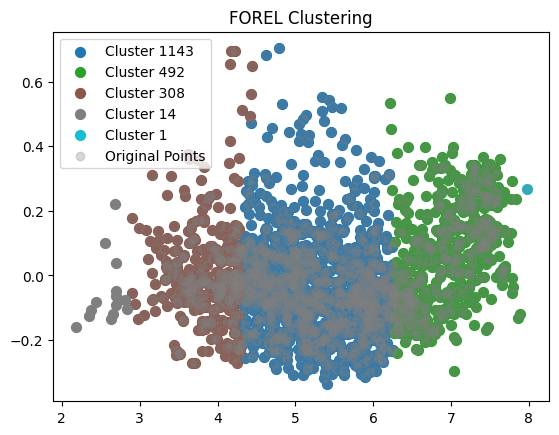

In [23]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

whr = pd.read_csv("whr.csv").dropna()
selected_data = whr[[ 'Happiness score', 'Generosity']]
data = selected_data.values

def forel(data, radius):
    clusters = []
    unvisited_points = data.copy()
    
    while len(unvisited_points) > 0:
        center = unvisited_points[np.random.randint(len(unvisited_points))]
        while True:
            distances = np.linalg.norm(unvisited_points - center, axis=1)
            cluster_points = unvisited_points[distances <= radius]
            new_center = cluster_points.mean(axis=0)
            if np.allclose(center, new_center):
                break
            center = new_center
        clusters.append(cluster_points)
        unvisited_points = unvisited_points[distances > radius]
    return clusters
radius = 1
clusters = forel(data, radius)

colors = plt.cm.tab10(np.linspace(0, 1, len(clusters)))
for cluster, color in zip(clusters, colors):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], s=50, color=color, label=f"Cluster {len(cluster)}")

plt.scatter(data[:, 0], data[:, 1], c='gray', alpha=0.3, label="Original Points")
plt.legend()
plt.title("FOREL Clustering")
plt.show()

Кількість кластерів: 10


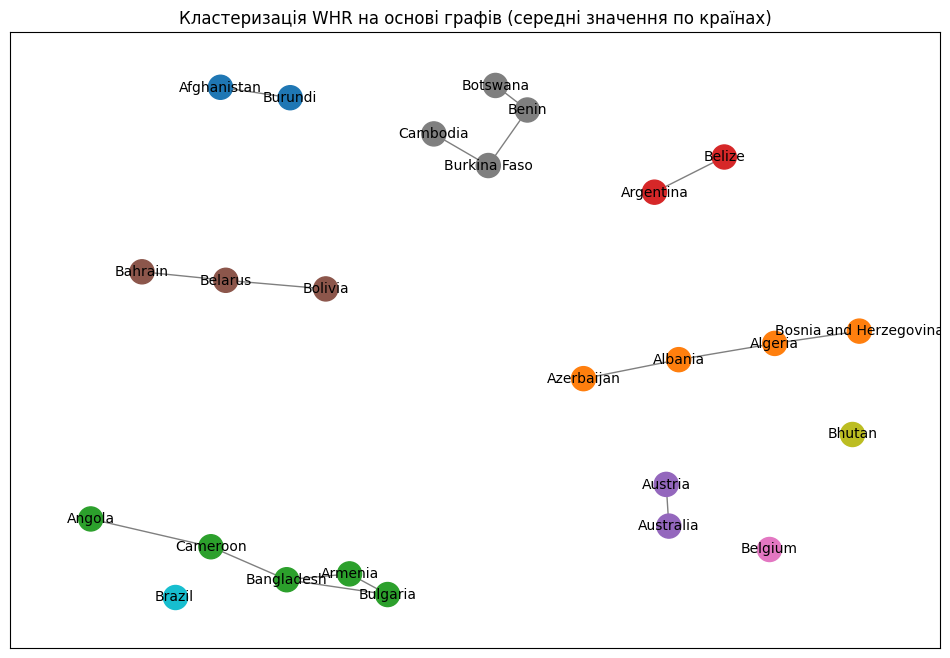

In [19]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

whr = pd.read_csv("whr.csv").dropna().head(300)

data_grouped = whr.groupby('Country name')[['Happiness score', 'Generosity']].mean().reset_index()

distances = euclidean_distances(data_grouped[['Happiness score', 'Generosity']])

threshold = 0.2  

G = nx.Graph()

for i, row in data_grouped.iterrows():
    G.add_node(row['Country name'], score=row['Happiness score'], generosity=row['Generosity'])

for i in range(len(distances)):
    for j in range(i + 1, len(distances)):
        if distances[i, j] < threshold:
            G.add_edge(data_grouped.iloc[i]['Country name'], data_grouped.iloc[j]['Country name'], weight=distances[i, j])

clusters = list(nx.connected_components(G))

print(f"Кількість кластерів: {len(clusters)}")
pos = nx.spring_layout(G) 
plt.figure(figsize=(12, 8))

colors = [plt.cm.tab10(i) for i in range(len(clusters))]
for i, cluster in enumerate(clusters):
    nx.draw_networkx_nodes(G, pos, nodelist=cluster, node_color=[colors[i]] * len(cluster))

nx.draw_networkx_edges(G, pos, alpha=0.5)


nx.draw_networkx_labels(G, pos, font_size=10)

plt.title("Кластеризація WHR на основі графів (середні значення по країнах)")
plt.show()


In [31]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

# Завантаження даних WHR
whr = pd.read_csv("whr.csv")
whr.dtypes

Country name                         object
Iso alpha                            object
year                                  int64
Happiness score                     float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
Positive affect                     float64
Negative affect                     float64
dtype: object

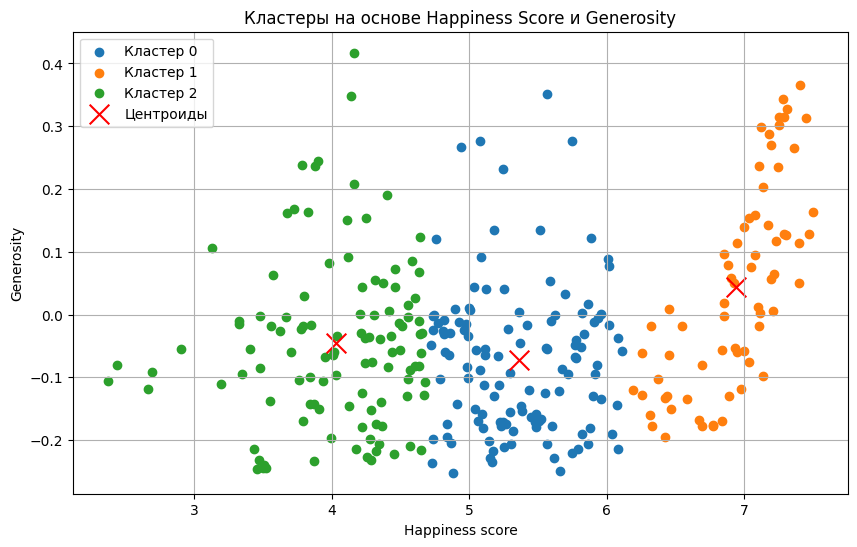

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = pd.read_csv("whr.csv").dropna().head(300)
selected_features = data[['Happiness score', 'Generosity']]
selected_features = selected_features.dropna()

k = 3  
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(selected_features)

plt.figure(figsize=(10, 6))
for cluster in range(k):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Happiness score'], cluster_data['Generosity'], label=f'Кластер {cluster}')
    
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Центроиды')

plt.xlabel('Happiness score')
plt.ylabel('Generosity')
plt.title('Кластеры на основе Happiness Score и Generosity')
plt.legend()
plt.grid()
plt.show()

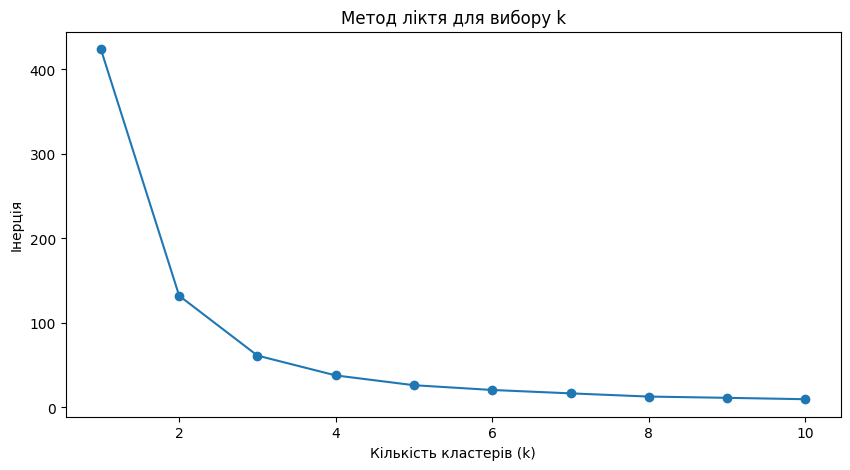

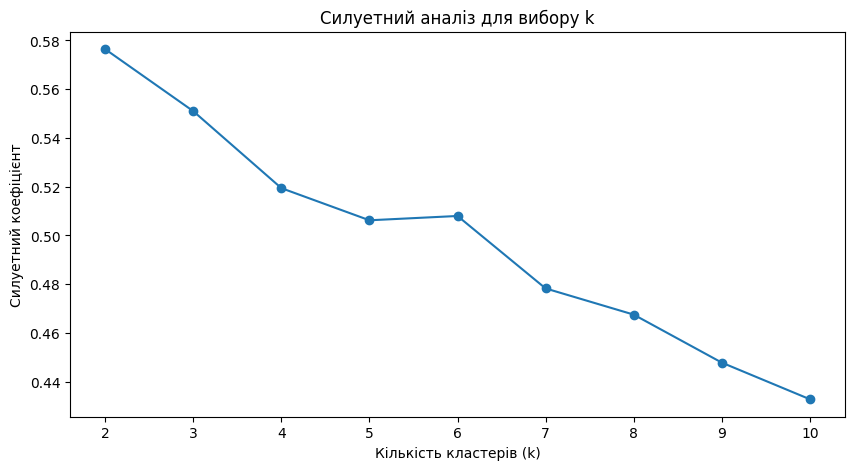

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

data = pd.read_csv("whr.csv").dropna().head(300)[["Happiness score", "Generosity"]]

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('Інерція')
plt.title('Метод ліктя для вибору k')
plt.show()


silhouette_scores = []

for k in range(2, 11):  # Починаємо з 2 кластерів
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    score = silhouette_score(data, labels)
    silhouette_scores.append(score)
-
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('Силуетний коефіцієнт')
plt.title('Силуетний аналіз для вибору k')
plt.show()

  Country name Iso alpha  year  Happiness score  Log GDP per capita  \
0  Afghanistan       AFG  2008            3.724               7.350   
1  Afghanistan       AFG  2009            4.402               7.509   
2  Afghanistan       AFG  2010            4.758               7.614   
3  Afghanistan       AFG  2011            3.832               7.581   
4  Afghanistan       AFG  2012            3.783               7.661   

   Social support  Healthy life expectancy at birth  \
0           0.451                              50.5   
1           0.552                              50.8   
2           0.539                              51.1   
3           0.521                              51.4   
4           0.521                              51.7   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.718       0.168                      0.882   
1                         0.679       0.191                      0.850   
2                   

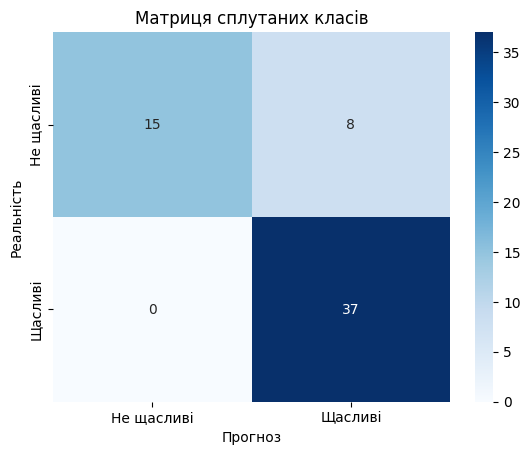

              precision    recall  f1-score   support

           0       1.00      0.65      0.79        23
           1       0.82      1.00      0.90        37

    accuracy                           0.87        60
   macro avg       0.91      0.83      0.85        60
weighted avg       0.89      0.87      0.86        60



In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Завантаження таблиці WHR
data = pd.read_csv("whr.csv").dropna().head(300)

# Попередній огляд даних
print(data.head())

# Створюємо цільову змінну (наприклад, країни з Happiness Score > 5 будуть 'щасливими')
data['Happy'] = (data['Happiness score'] > 5).astype(int)

# Вибираємо ознаки для класифікації
features = ['Log GDP per capita', 'Social support', 'Generosity']

X = data[features]  # Ознаки
y = data['Happy']   # Цільова змінна

# Розподіл даних на тренувальну та тестову вибірки (80% тренування, 20% тестування)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Побудова логістичної регресії
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Прогнозування на тестових даних
y_pred = model.predict(X_test)

# Оцінка моделі
accuracy = accuracy_score(y_test, y_pred)
print(f"Точність моделі: {accuracy:.2f}")

# Матриця сплутаних класів
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Не щасливі', 'Щасливі'], yticklabels=['Не щасливі', 'Щасливі'])
plt.xlabel('Прогноз')
plt.ylabel('Реальність')
plt.title('Матриця сплутаних класів')
plt.show()

print(classification_report(y_test, y_pred))